<a href="https://colab.research.google.com/github/Joovvhan/Master-Thesis/blob/master/log/P1-P5_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary modules

import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wf
import time
import glob
import datetime

from tqdm import trange

# Import Keras modules

from keras.preprocessing import image
from keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.models import Sequential
from keras import backend as K
from keras.models import load_model


Using TensorFlow backend.


In [2]:
# Mount google drive

from google.colab import drive
drive.mount('/content/gdrive')
os.listdir('gdrive/My Drive/Colab')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


['Data', 'Model', 'Data_']

In [0]:
# Set data directories

dataPath = 'gdrive/My Drive/Colab/Data'

# Changed variable names to normal and fault
# Changed variable names from folder to path
# Need to consider multiple folders
# Need to add files to be tested

#folderNormal = ['A1F3P3']
folderNormal = list()

for x in range(1, 6):
    for y in range(1, 6):
        for z in range(1, 2):
            #if (x <= 2 and y <= 2 and z <= 2):
            folderNormal.append('A{}F{}P{}'.format(x, y, z))

folderFault = list()

# folderFault = ['A5F3P3']

for x in range(1, 6):
    for y in range(1, 6):
        for z in range(5, 6):
            #if (x == 5 or y == 5 or z == 5):
            folderFault.append('A{}F{}P{}'.format(x, y, z))


pathNormal = list()
pathFault = list()

for i in range(len(folderNormal)):
    pathNormal.append(dataPath + '/' + folderNormal[i])
    
for i in range(len(folderFault)):
    pathFault.append(dataPath + '/' + folderFault[i])

In [0]:
# Specgram settings

nsc = 1470
nov = nsc/2
nff = nsc 
imgSize = 224

# pretrainedModel = 'VGG19'
# pretrainedModel = 'Xception'
pretrainedModel = 'ResNet50'

# pretrainedModel = 'VGG19'
# pretrainedModel = 'InceptionV3'
#pretrainedModel = 'DenseNet169'
#pretrainedModel = 'DenseNet201'


lastActivation = 'softmax'
sizeBatch = 4
numEpochs = 16
verb = 1


# Learning parameters

trainingRatio = 0.8

totalDataNum = 1000
repeat = 1

In [5]:
startNum = 0

pickNum = int(np.ceil(totalDataNum / len(pathNormal)))

for i in range(startNum, len(pathNormal)):

    npyTestPath = glob.glob(pathNormal[i] + '/' + '*Image_With_Label.npy')
    data = np.load(npyTestPath[0])
    
    pickIdx = np.random.choice(1000, pickNum, replace=False)
    pickIdx.sort()
    
#     imgs = np.moveaxis(np.dstack(data[:, 0]), 2, 0)
#     label = data[:, 1:5]

    imgs = np.moveaxis(np.dstack(data[pickIdx, 0]), 2, 0)
    label = data[pickIdx, 1:5]
    
    if i == startNum:
        labelListNormal = label
        imgsNormal = imgs
    else:
        labelListNormal = np.vstack([labelListNormal, label])
        imgsNormal = np.vstack([imgsNormal, imgs])

    print('Normal Image Shape From {}: {}:'.format(pathNormal[i], totalDataNum))    
    print('Selected {}/{}:'.format(pickNum * (i + 1), len(data)))    
    
    
print('Normal Image Shape: {}'.format(imgsNormal.shape))


Normal Image Shape From gdrive/My Drive/Colab/Data/A1F1P1: 1000:
Selected 40/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A1F2P1: 1000:
Selected 80/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A1F3P1: 1000:
Selected 120/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A1F4P1: 1000:
Selected 160/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A1F5P1: 1000:
Selected 200/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A2F1P1: 1000:
Selected 240/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A2F2P1: 1000:
Selected 280/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A2F3P1: 1000:
Selected 320/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A2F4P1: 1000:
Selected 360/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A2F5P1: 1000:
Selected 400/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A3F1P1: 1000:
Selected 440/1000:
Normal Image Shape From gdrive/My Drive/Colab/Data/A3F2P1: 1000:
Selected 480/

In [6]:
startNum = 0

pickNum = int(np.ceil(totalDataNum / len(pathFault)))

for i in range(startNum, len(pathFault)):

    npyTestPath = glob.glob(pathFault[i] + '/' + '*Image_With_Label.npy')
    data = np.load(npyTestPath[0])
    
    pickIdx = np.random.choice(1000, pickNum, replace=False)
    pickIdx.sort()
    
#     imgs = np.moveaxis(np.dstack(data[:, 0]), 2, 0)
#     label = data[:, 1:5]
    
    imgs = np.moveaxis(np.dstack(data[pickIdx, 0]), 2, 0)
    label = data[pickIdx, 1:5]
    
    if i == startNum:
        labelListFault = label
        imgsFault = imgs
    else:
        labelListFault = np.vstack([labelListFault, label])
        imgsFault = np.vstack([imgsFault, imgs])

    print('Fault Image Shape From {}: {}:'.format(pathFault[i], totalDataNum))    
    print('Selected {}/{}:'.format(pickNum * (i + 1), len(data)))     
    
print('Fault Image Shape: {}'.format(imgsFault.shape))

Fault Image Shape From gdrive/My Drive/Colab/Data/A1F1P5: 1000:
Selected 40/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A1F2P5: 1000:
Selected 80/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A1F3P5: 1000:
Selected 120/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A1F4P5: 1000:
Selected 160/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A1F5P5: 1000:
Selected 200/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A2F1P5: 1000:
Selected 240/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A2F2P5: 1000:
Selected 280/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A2F3P5: 1000:
Selected 320/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A2F4P5: 1000:
Selected 360/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A2F5P5: 1000:
Selected 400/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A3F1P5: 1000:
Selected 440/1000:
Fault Image Shape From gdrive/My Drive/Colab/Data/A3F2P5: 1000:
Selected 480/1000:
Fault 

In [7]:
# Change name from imgsF1 or imgsF5 to imgsNormal and imgsFault

dataNumNormal = len(imgsNormal)
dataNumFault = len(imgsFault)
dataNumNormalTrain = int(dataNumNormal * trainingRatio)
dataNumFaultTrain = int(dataNumFault * trainingRatio)
dataNumNormalTest = dataNumNormal - dataNumNormalTrain
dataNumFaultTest = dataNumFault - dataNumFaultTrain

print('Normal Train:Test = {:d}:{:d}'.format(dataNumNormalTrain, dataNumNormalTest))
print('Fault  Train:Test = {:d}:{:d}\n'.format(dataNumFaultTrain, dataNumFaultTest))

trainIdxNormal = np.random.choice(dataNumNormal - 1, dataNumNormalTrain, replace=False)
testIdxNormal = list(set(range(0, dataNumNormal)) - set(trainIdxNormal))

trainImgsNormal = imgsNormal[trainIdxNormal, :, :]
testImgsNormal = imgsNormal[testIdxNormal, :, :]

print('Normal Training Image Shape {}'.format(trainImgsNormal.shape))
print('Normal Test Image Shape {}\n'.format(testImgsNormal.shape))

trainIdxFault  = np.random.choice(dataNumFault - 1, dataNumFaultTrain, replace=False)
testIdxFault = list(set(range(0, dataNumFault)) - set(trainIdxFault))

trainImgsFault = imgsFault[trainIdxFault, :, :]
testImgsFault = imgsFault[testIdxFault, :, :]

print('Fault Training Image Shape {}'.format(trainImgsFault.shape))
print('Fault Test Image Shape {}\n'.format(testImgsFault.shape))

trainImgs = np.vstack([trainImgsNormal, trainImgsFault])
testImgs = np.vstack([testImgsNormal, testImgsFault])

print('Training Image Shape {}'.format(trainImgs.shape))
print('Test Image Shape {}'.format(testImgs.shape))

Normal Train:Test = 800:200
Fault  Train:Test = 800:200

Normal Training Image Shape (800, 224, 224)
Normal Test Image Shape (200, 224, 224)

Fault Training Image Shape (800, 224, 224)
Fault Test Image Shape (200, 224, 224)

Training Image Shape (1600, 224, 224)
Test Image Shape (400, 224, 224)


In [8]:
trainMean = np.mean(trainImgs)
trainStd = np.std(trainImgs)

print('Mean of Training Image: {}'.format(trainMean))
print('Standard Deviation of Training Image: {}'.format(trainStd))

Mean of Training Image: -78.3161566226221
Standard Deviation of Training Image: 9.335931464786146


In [0]:
# Should Change Norm to Normalized

trainImgsNorm = (trainImgs - trainMean) / trainStd
testImgsNorm = (testImgs - trainMean) / trainStd

trainImgsNorm = trainImgsNorm.reshape(list(trainImgsNorm.shape) + [1])
testImgsNorm = testImgsNorm.reshape(list(testImgsNorm.shape) + [1])

In [10]:
X_train = np.stack([trainImgsNorm[:, :, :, 0], trainImgsNorm[:, :, :, 0], trainImgsNorm[:, :, :, 0]], axis = -1)
X_test = np.stack([testImgsNorm[:, :, :, 0], testImgsNorm[:, :, :, 0], testImgsNorm[:, :, :, 0]], axis = -1)

print('X_train Shape: {}'.format(X_train.shape))
print('X_test  Shape: {}'.format(X_test.shape))

X_train Shape: (1600, 224, 224, 3)
X_test  Shape: (400, 224, 224, 3)


In [11]:
trainLabelNormal = np.stack((np.ones(dataNumNormalTrain), np.zeros(dataNumNormalTrain)), axis = -1)
testLabelNormal = np.stack((np.ones(dataNumNormalTest), np.zeros(dataNumNormalTest)), axis = -1)

trainLabelFault = np.stack((np.zeros(dataNumFaultTrain), np.ones(dataNumFaultTrain)), axis = -1)
testLabelFault = np.stack((np.zeros(dataNumFaultTest), np.ones(dataNumFaultTest)), axis = -1)

Y_train = np.vstack((trainLabelNormal, trainLabelFault))
Y_test = np.vstack((testLabelNormal, testLabelFault))

print('Y_train Normal:Fault = {:d}:{:d}'.format(len(trainLabelNormal), len(trainLabelFault)))
print('Y_test  Normal:Fault = {:d}:{:d}'.format(len(testLabelNormal), len(testLabelFault)))

Y_train Normal:Fault = 800:800
Y_test  Normal:Fault = 200:200


In [12]:
from keras.applications import VGG19
from keras.applications import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.xception import Xception
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import DenseNet201
from keras.applications.inception_v3 import InceptionV3

# pretrainedModel = 'ResNet50'
# lastActivation = 'softmax'
# lossFunction = 'binary_crossentropy'
# sizeBatch = 2
# numEpochs = 2
# verb = 1

for rp in range(repeat):

    # Refresh all background variables
    K.clear_session()

    input_tensor = Input(shape=(imgSize, imgSize, 3))

    # Building sequential model with name 'model'
    model = Sequential()

    # Model selection

    if (pretrainedModel == 'VGG16'):

        modelWoTop = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(Flatten())
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'VGG19'):

        modelWoTop = VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(Flatten())
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(2, activation=lastActivation))

    elif pretrainedModel == 'ResNet50':

        modelWoTop = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(Flatten())
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'InceptionV3'):
        modelWoTop = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(GlobalAveragePooling2D())
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'Xception'):
        modelWoTop = Xception(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(GlobalAveragePooling2D())
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'DenseNet169'):

        modelWoTop = DenseNet169(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(GlobalAveragePooling2D())
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'DenseNet201'):
        modelWoTop = DenseNet201(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(GlobalAveragePooling2D())
        model.add(Dense(2, activation=lastActivation))

    else:
        print('Invalid Pretrained Model Selection')



    # Model compiling

    print('Compiling Pretrained {} Model'.format(model.layers[0].name))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print('Training Pretrained {} Model'.format(model.layers[0].name))
    print('Batch Size: {}\t Epochs: {}\t\n'.format(sizeBatch, numEpochs))

    model.fit(X_train, Y_train,
              batch_size=sizeBatch, epochs=numEpochs, verbose=1,
              validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 26s 0us/step
Compiling Pretrained resnet50 Model
Training Pretrained resnet50 Model
Batch Size: 4	 Epochs: 16	

Train on 1600 samples, validate on 400 samples
Epoch 1/16
1600/1600 [==============================] - 138s 86ms/step - loss: 2.1915 - acc: 0.6750 - val_loss: 0.5641 - val_acc: 0.7775
Epoch 2/16
1600/1600 [==============================] - 121s 76ms/step - loss: 1.3476 - acc: 0.6825 - val_loss: 0.5829 - val_acc: 0.6975
Epoch 3/16
1600/1600 [==============================] - 121s 76ms/step - loss: 1.6278 - acc: 0.6481 - val_loss: 6.2513 - val_acc: 0.5925
Epoch 4/16
1600/1600 [==============================] - 122s 76ms/step - loss: 2.1749 - acc: 0.5681 - val_loss: 1.3201 - val_acc: 0.5650
Epoch 5/16
1600/1600 [==============================] - 121s 76ms/step - loss: 2.3203 - acc: 0.5619 - val_loss: 3.6929 - val_acc: 0.6275
Epoch 6/16
1600/1600 [==============================] - 121s 76ms/step - loss: 1.9359 - acc: 0.6150 - v

In [13]:

for rp in range(repeat):

    # Refresh all background variables
    K.clear_session()

    input_tensor = Input(shape=(imgSize, imgSize, 3))

    # Building sequential model with name 'model'
    model = Sequential()

    # Model selection

    if (pretrainedModel == 'VGG16'):

        modelWoTop = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(Flatten())
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'VGG19'):

        modelWoTop = VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(Flatten())
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(4096, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(2, activation=lastActivation))

    elif pretrainedModel == 'ResNet50':

        modelWoTop = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(Flatten())
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'InceptionV3'):
        modelWoTop = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(GlobalAveragePooling2D())
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'Xception'):
        modelWoTop = Xception(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(GlobalAveragePooling2D())
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'DenseNet169'):

        modelWoTop = DenseNet169(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(GlobalAveragePooling2D())
        model.add(Dense(2, activation=lastActivation))

    elif (pretrainedModel == 'DenseNet201'):
        modelWoTop = DenseNet201(input_tensor=input_tensor, weights='imagenet', include_top=False)
        model.add(modelWoTop)
        model.add(GlobalAveragePooling2D())
        model.add(Dense(2, activation=lastActivation))

    else:
        print('Invalid Pretrained Model Selection')



    # Model compiling

    print('Compiling Pretrained {} Model'.format(model.layers[0].name))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print('Training Pretrained {} Model'.format(model.layers[0].name))
    print('Batch Size: {}\t Epochs: {}\t\n'.format(sizeBatch, numEpochs))

    model.fit(X_train, Y_train,
              batch_size=sizeBatch, epochs=numEpochs, verbose=1,
              validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Compiling Pretrained resnet50 Model
Training Pretrained resnet50 Model
Batch Size: 4	 Epochs: 16	

Train on 1600 samples, validate on 400 samples
Epoch 1/16
1600/1600 [==============================] - 135s 84ms/step - loss: 7.8313 - acc: 0.5100 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 2/16
1600/1600 [==============================] - 121s 76ms/step - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 3/16
1600/1600 [==============================] - 121s 76ms/step - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 4/16
1600/1600 [==============================] - 121s 76ms/step - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 5/16
1600/1600 [==============================] - 121s 76ms/step - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 6/16
1600/1600 [==============================] - 121s 76ms/step - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 7/16
1600/1600 [==========

In [17]:
# Refresh all background variables
K.clear_session()

input_tensor = Input(shape=(imgSize, imgSize, 3))

# Building sequential model with name 'model'
model = Sequential()

# Model selection

if (pretrainedModel == 'VGG16'):

    modelWoTop = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'VGG19'):

    modelWoTop = VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))

elif pretrainedModel == 'ResNet50':

    modelWoTop = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'InceptionV3'):
    modelWoTop = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'Xception'):
    modelWoTop = Xception(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'DenseNet169'):

    modelWoTop = DenseNet169(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'DenseNet201'):
    modelWoTop = DenseNet201(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

else:
    print('Invalid Pretrained Model Selection')



# Model compiling

print('Compiling Pretrained {} Model'.format(model.layers[0].name))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Training Pretrained {} Model'.format(model.layers[0].name))
print('Batch Size: {}\t Epochs: {}\t\n'.format(sizeBatch, numEpochs))

model.fit(X_train, Y_train,
          batch_size=sizeBatch, epochs=numEpochs, verbose=1,
          validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Compiling Pretrained resnet50 Model
Training Pretrained resnet50 Model
Batch Size: 4	 Epochs: 16	

Train on 1600 samples, validate on 400 samples
Epoch 1/16
1600/1600 [==============================] - 135s 84ms/step - loss: 8.0099 - acc: 0.4994 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 2/16
1600/1600 [==============================] - 122s 76ms/step - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 3/16
1600/1600 [==============================] - 121s 76ms/step - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 4/16
1600/1600 [==============================] - 121s 76ms/step - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 5/16
1600/1600 [==============================] - 121s 76ms/step - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 6/16
1600/1600 [==============================] - 121s 76ms/step - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 7/16
1600/1600 [==========

In [18]:
K.clear_session()

input_tensor = Input(shape=(imgSize, imgSize, 3))

# Building sequential model with name 'model'
model = Sequential()

# Model selection

if (pretrainedModel == 'VGG16'):

    modelWoTop = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'VGG19'):

    modelWoTop = VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))

elif pretrainedModel == 'ResNet50':

    modelWoTop = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'InceptionV3'):
    modelWoTop = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'Xception'):
    modelWoTop = Xception(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'DenseNet169'):

    modelWoTop = DenseNet169(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'DenseNet201'):
    modelWoTop = DenseNet201(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

else:
    print('Invalid Pretrained Model Selection')



# Model compiling

print('Compiling Pretrained {} Model'.format(model.layers[0].name))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Training Pretrained {} Model'.format(model.layers[0].name))
print('Batch Size: {}\t Epochs: {}\t\n'.format(sizeBatch, numEpochs))

model.fit(X_train, Y_train,
          batch_size=sizeBatch, epochs=numEpochs, verbose=1,
          validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Compiling Pretrained resnet50 Model
Training Pretrained resnet50 Model
Batch Size: 4	 Epochs: 16	

Train on 1600 samples, validate on 400 samples
Epoch 1/16
1600/1600 [==============================] - 134s 83ms/step - loss: 8.0173 - acc: 0.4988 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 2/16
1600/1600 [==============================] - 121s 75ms/step - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 3/16
1600/1600 [==============================] - 120s 75ms/step - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 4/16
1600/1600 [==============================] - 121s 75ms/step - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 5/16
1600/1600 [==============================] - 121s 75ms/step - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 6/16
1600/1600 [==============================] - 121s 76ms/step - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 7/16
1600/1600 [==========

In [19]:
K.clear_session()

input_tensor = Input(shape=(imgSize, imgSize, 3))

# Building sequential model with name 'model'
model = Sequential()

# Model selection

if (pretrainedModel == 'VGG16'):

    modelWoTop = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'VGG19'):

    modelWoTop = VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))

elif pretrainedModel == 'ResNet50':

    modelWoTop = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'InceptionV3'):
    modelWoTop = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'Xception'):
    modelWoTop = Xception(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'DenseNet169'):

    modelWoTop = DenseNet169(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'DenseNet201'):
    modelWoTop = DenseNet201(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

else:
    print('Invalid Pretrained Model Selection')



# Model compiling

print('Compiling Pretrained {} Model'.format(model.layers[0].name))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Training Pretrained {} Model'.format(model.layers[0].name))
print('Batch Size: {}\t Epochs: {}\t\n'.format(sizeBatch, numEpochs))

model.fit(X_train, Y_train,
          batch_size=sizeBatch, epochs=numEpochs, verbose=1,
          validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Compiling Pretrained resnet50 Model
Training Pretrained resnet50 Model
Batch Size: 4	 Epochs: 16	

Train on 1600 samples, validate on 400 samples
Epoch 1/16
1600/1600 [==============================] - 134s 84ms/step - loss: 7.9780 - acc: 0.5012 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 2/16
1600/1600 [==============================] - 121s 75ms/step - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 3/16
1600/1600 [==============================] - 121s 76ms/step - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 4/16
1600/1600 [==============================] - 121s 75ms/step - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 5/16
1600/1600 [==============================] - 121s 76ms/step - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 6/16
1600/1600 [==============================] - 121s 76ms/step - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 7/16
1600/1600 [==========

In [20]:
K.clear_session()

input_tensor = Input(shape=(imgSize, imgSize, 3))

# Building sequential model with name 'model'
model = Sequential()

# Model selection

if (pretrainedModel == 'VGG16'):

    modelWoTop = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'VGG19'):

    modelWoTop = VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))

elif pretrainedModel == 'ResNet50':

    modelWoTop = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'InceptionV3'):
    modelWoTop = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'Xception'):
    modelWoTop = Xception(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'DenseNet169'):

    modelWoTop = DenseNet169(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'DenseNet201'):
    modelWoTop = DenseNet201(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

else:
    print('Invalid Pretrained Model Selection')



# Model compiling

print('Compiling Pretrained {} Model'.format(model.layers[0].name))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Training Pretrained {} Model'.format(model.layers[0].name))
print('Batch Size: {}\t Epochs: {}\t\n'.format(sizeBatch, numEpochs))

model.fit(X_train, Y_train,
          batch_size=sizeBatch, epochs=numEpochs, verbose=1,
          validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Compiling Pretrained resnet50 Model
Training Pretrained resnet50 Model
Batch Size: 4	 Epochs: 16	

Train on 1600 samples, validate on 400 samples
Epoch 1/16
1600/1600 [==============================] - 133s 83ms/step - loss: 2.2639 - acc: 0.6794 - val_loss: 0.7009 - val_acc: 0.5000
Epoch 2/16
1600/1600 [==============================] - 121s 75ms/step - loss: 2.7920 - acc: 0.5006 - val_loss: 0.6940 - val_acc: 0.5000
Epoch 3/16
1600/1600 [==============================] - 120s 75ms/step - loss: 2.3203 - acc: 0.5212 - val_loss: 2.3277 - val_acc: 0.5950
Epoch 4/16
1600/1600 [==============================] - 120s 75ms/step - loss: 2.5627 - acc: 0.5319 - val_loss: 2.3063 - val_acc: 0.5050
Epoch 5/16
1600/1600 [==============================] - 121s 75ms/step - loss: 3.0118 - acc: 0.5075 - val_loss: 6.6204 - val_acc: 0.5175
Epoch 6/16
1600/1600 [==============================] - 120s 75ms/step - loss: 3.0577 - acc: 0.5231 - val_loss: 5.4604 - val_acc: 0.4925
Epoch 7/16
1600/1600 [==========

In [0]:
# print('Training Pretrained {} Model'.format(model.layers[0].name))
# print('Batch Size: {}\t Epochs: {}\t\n'.format(sizeBatch, numEpochs))

# model.fit(X_train, Y_train,
#           batch_size=sizeBatch, epochs=numEpochs, verbose=1,
#           validation_data=(X_test, Y_test))

# Y_pred = model.predict(X_test)

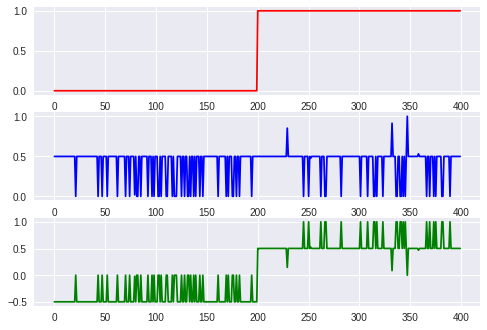

In [22]:
Y_pred = model.predict(X_test)

plt.subplot(3, 1, 1)
plt.plot(Y_test[:, 1], 'r')

plt.subplot(3, 1, 2)
plt.plot(Y_pred[:, 1], 'b')

plt.subplot(3, 1, 3)
plt.plot(Y_test[:, 1] - Y_pred[:, 1], 'g')

plt.show()

In [23]:
now = datetime.datetime.now()

# modelSaved = '{}-{}_{}_{}.h5'.format(folderNormal, folderFault, pretrainedModel, now.strftime('%m-%d-%H:%M:%S'))

modelSaved = '{}-{}_{}_{}.h5'.format('A1', 'A5', pretrainedModel, now.strftime('%m-%d-%H:%M:%S'))
meanSaved = 'mean_{}.npy'.format(now.strftime('%m-%d-%H:%M:%S'))
stdSaved = 'std_{}.npy'.format(now.strftime('%m-%d-%H:%M:%S'))

inputStr = input('''Save Model as '{}'? (y/n)\n'''.format(modelSaved))

if (inputStr == 'y' or inputStr == 'Y'):  
    model.save('gdrive/My Drive/Colab/Model/{}'.format(modelSaved))
    np.save('gdrive/My Drive/Colab/Model/{}'.format(meanSaved), trainMean)
    np.save('gdrive/My Drive/Colab/Model/{}'.format(stdSaved), trainStd)

Save Model as 'A1-A5_ResNet50_11-19-08:42:03.h5'? (y/n)
n
